### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import metrics
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

## Data Preparation

In [2]:
# Load the CSV file into a DataFrame
whitewine_df = pd.read_csv('winequality-white.csv', delimiter=';')
redwine_df = pd.read_csv('winequality-red.csv', delimiter=';')

In [3]:
# Check the shape of the White Whine DataFrame
display('Shape of the DataFrame:', whitewine_df.shape)

# Display summary statistics of the White Whine DataFrame
display(whitewine_df.describe())

# Display info of the White Whine DataFrame
display(whitewine_df.info())

# Check for missing values
display('\nMissing values:\n', whitewine_df.isnull().sum())

# Check the data types of the columns in the White Whine DataFrame
display('\nData types: \n', whitewine_df.dtypes)

'Shape of the DataFrame:'

(4898, 12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


None

'\nMissing values:\n'

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

'\nData types: \n'

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
# Check the shape of the Red Whine DataFrame
display('Shape of the DataFrame:', redwine_df.shape)

# Display summary statistics of the Red Whine DataFrame
display(redwine_df.describe())

# Display info of the Red Whine DataFrame
display(redwine_df.info())

# Check for missing values
display('\nMissing values:\n', redwine_df.isnull().sum())

# Check the data types of the columns in the Red Whine DataFrame
display('\nData types: \n', redwine_df.dtypes)

'Shape of the DataFrame:'

(1599, 12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

'\nMissing values:\n'

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

'\nData types: \n'

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
# Add variable type to identify white and red wine
whitewine_df['type'] = 0
redwine_df['type'] = 1

- 0 - White Wine
- 1 - Red Wine

In [6]:
# Check for duplicates in data
display(whitewine_df.duplicated().sum())
display(redwine_df.duplicated().sum())

# Drop duplicates
whitewine_df = whitewine_df.drop_duplicates()
redwine_df = redwine_df.drop_duplicates()

937

240

In [7]:
# Merge the datasets
wine_df = pd.concat([whitewine_df, redwine_df])
display(wine_df.head())
display(wine_df.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


(5320, 13)

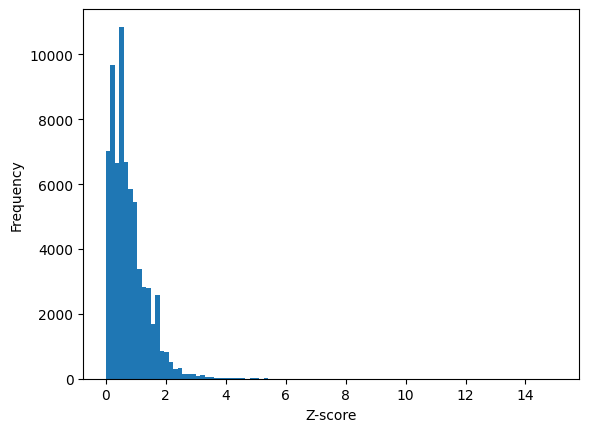

'Original number of rows: 5320'

'No. of rows after removing outliers using 3 std dev: 4869'

'No. of rows after removing outliers using 4 std dev: 5165'

'No. of rows that are within std dev 3 to 4 : 296'

'Number of rows after removing outliers: 4869'

In [8]:
# Calculate the z-scores of all the columns in the DataFrame
z_scores = np.abs(stats.zscore(wine_df))

# Adjust the number of bins as needed
plt.hist(z_scores.values.flatten(), bins=100)  

# Add labels and title
plt.xlabel('Z-score')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Set minimum and maximum threshold values for the z-scores
min_threshold = 3
max_threshold = 4

# Display the number of rows in the DataFrame before removing outliers
display('Original number of rows: {}'.format(wine_df.shape[0]))
display('No. of rows after removing outliers using 3 std dev: {}'.format(wine_df[(z_scores < min_threshold).all(axis=1)].shape[0]))
display('No. of rows after removing outliers using 4 std dev: {}'.format(wine_df[(z_scores < max_threshold).all(axis=1)].shape[0]))
display('No. of rows that are within std dev 3 to 4 : {}'.format(abs(wine_df[(z_scores < min_threshold).all(axis=1)].shape[0]- wine_df[(z_scores < max_threshold).all(axis=1)].shape[0])))

# Display the number of rows in the DataFrame after removing outliers
display('Number of rows after removing outliers: {}'.format(wine_df[(z_scores < min_threshold).all(axis=1)].shape[0]))

wine_df = wine_df[(z_scores < min_threshold).all(axis=1)]

In [9]:
# Split the dataset into training, validation, and testing sets
X = wine_df.drop('type', axis=1)
y = wine_df['type']

# Perform feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

In [10]:
display(wine_df.shape)

(4869, 13)

## Model Development


Model 1
--------------
Epoch 1/50
122/122 [==============================] - 1s 2ms/step - loss: 0.4814 - accuracy: 0.7969 - val_loss: 0.3157 - val_accuracy: 0.9243
Epoch 2/50
122/122 [==============================] - 0s 950us/step - loss: 0.2327 - accuracy: 0.9543 - val_loss: 0.1645 - val_accuracy: 0.9769
Epoch 3/50
122/122 [==============================] - 0s 997us/step - loss: 0.1269 - accuracy: 0.9846 - val_loss: 0.1015 - val_accuracy: 0.9820
Epoch 4/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0835 - accuracy: 0.9874 - val_loss: 0.0731 - val_accuracy: 0.9859
Epoch 5/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0630 - accuracy: 0.9892 - val_loss: 0.0580 - val_accuracy: 0.9872
Epoch 6/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9918 - val_loss: 0.0490 - val_accuracy: 0.9884
Epoch 7/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9931 - val_loss: 0.0430 -

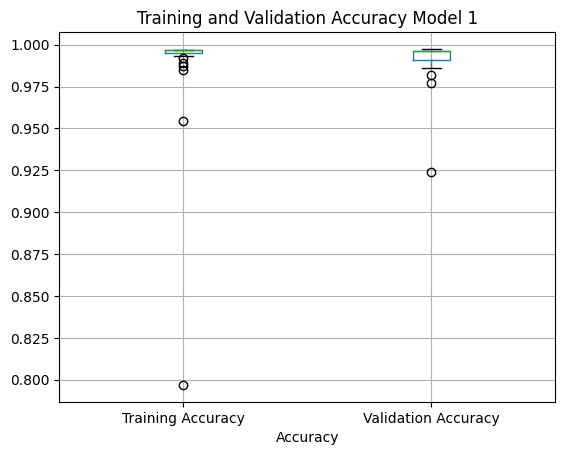


Validation Accuracy Model 1: 0.997433
Train Accuracy Model 1: 0.996919


25/25 [==============================] - 0s 674us/step

Confusion Matrix Model 1:
            pred:White  pred:Red
true:White         612         0
true:Red             2       165


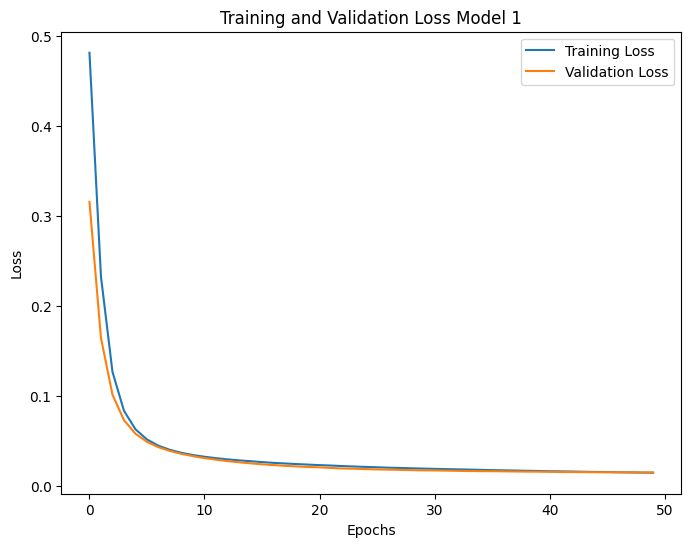

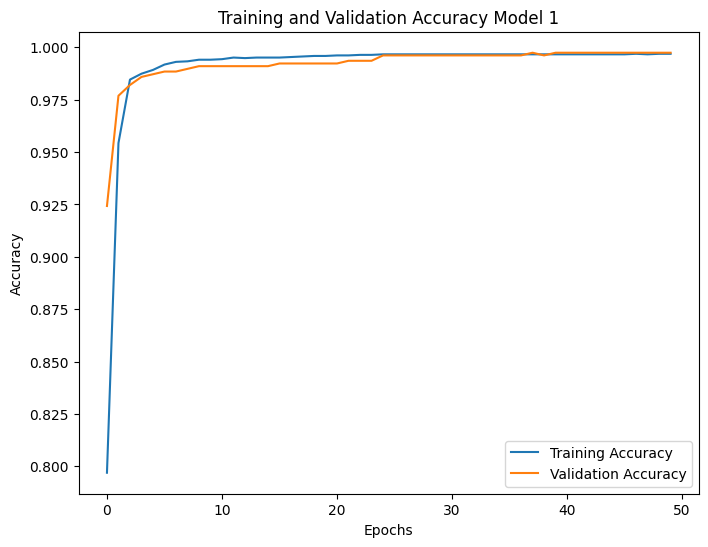

------------------------------------------------------------

Model 2
--------------
Epoch 1/50
122/122 [==============================] - 1s 2ms/step - loss: 0.3589 - accuracy: 0.8205 - val_loss: 0.2166 - val_accuracy: 0.9255
Epoch 2/50
122/122 [==============================] - 0s 1ms/step - loss: 0.1586 - accuracy: 0.9671 - val_loss: 0.0907 - val_accuracy: 0.9897
Epoch 3/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.9908 - val_loss: 0.0462 - val_accuracy: 0.9923
Epoch 4/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0433 - accuracy: 0.9936 - val_loss: 0.0332 - val_accuracy: 0.9936
Epoch 5/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.9946 - val_loss: 0.0279 - val_accuracy: 0.9949
Epoch 6/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9946 - val_loss: 0.0250 - val_accuracy: 0.9961
Epoch 7/50
122/122 [==============================] - 0s 1ms/st

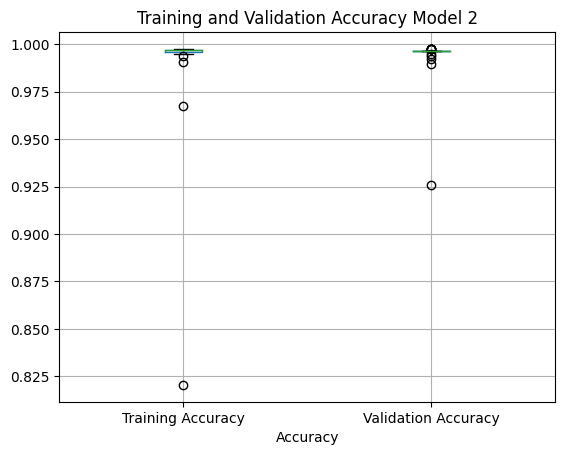


Validation Accuracy Model 2: 0.996149
Train Accuracy Model 2: 0.996919


25/25 [==============================] - 0s 584us/step

Confusion Matrix Model 2:
            pred:White  pred:Red
true:White         611         1
true:Red             2       165


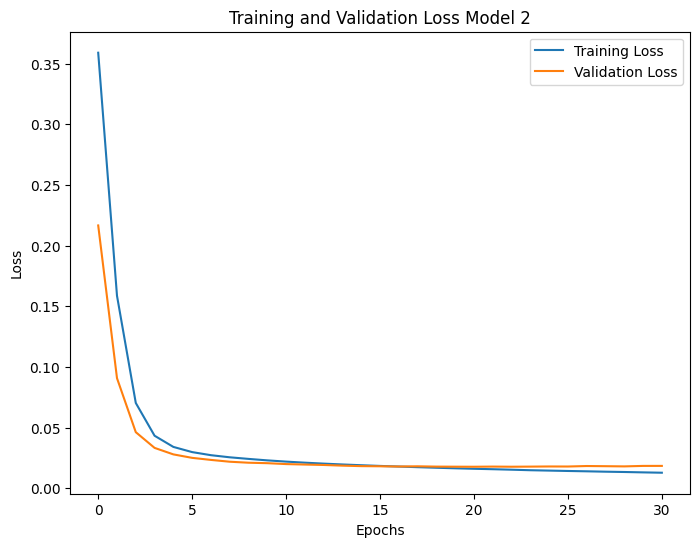

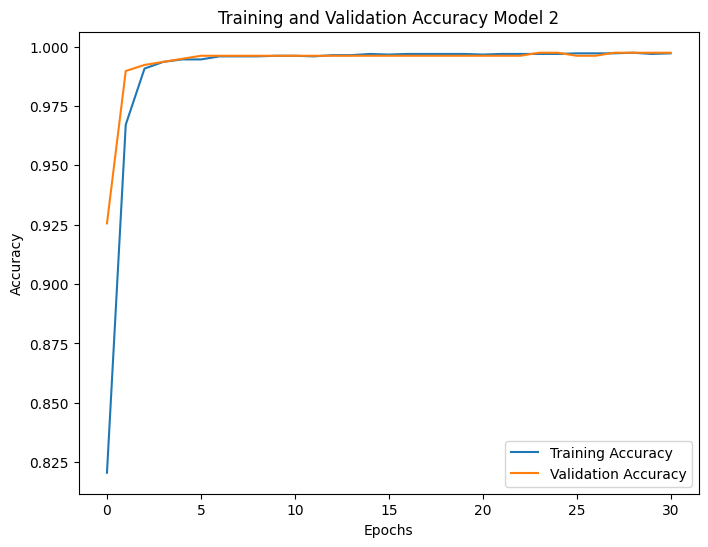

------------------------------------------------------------

Model 3
--------------
Epoch 1/50
122/122 [==============================] - 1s 2ms/step - loss: 0.3134 - accuracy: 0.9137 - val_loss: 0.1010 - val_accuracy: 0.9820
Epoch 2/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0629 - accuracy: 0.9910 - val_loss: 0.0446 - val_accuracy: 0.9884
Epoch 3/50
122/122 [==============================] - 0s 997us/step - loss: 0.0377 - accuracy: 0.9933 - val_loss: 0.0349 - val_accuracy: 0.9910
Epoch 4/50
122/122 [==============================] - 0s 995us/step - loss: 0.0313 - accuracy: 0.9944 - val_loss: 0.0307 - val_accuracy: 0.9936
Epoch 5/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.9949 - val_loss: 0.0289 - val_accuracy: 0.9936
Epoch 6/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.9951 - val_loss: 0.0269 - val_accuracy: 0.9949
Epoch 7/50
122/122 [==============================] - 0s 1m

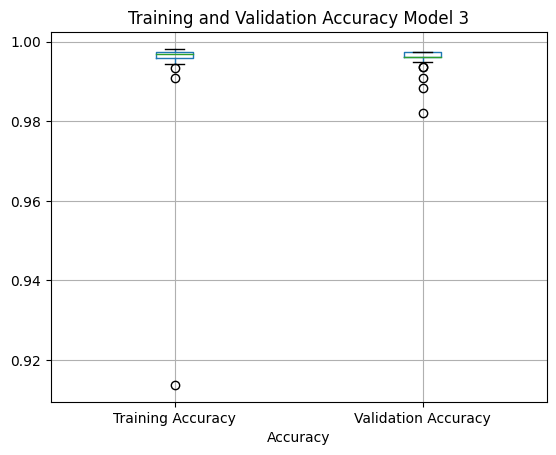


Validation Accuracy Model 3: 0.996149
Train Accuracy Model 3: 0.997433


25/25 [==============================] - 0s 690us/step

Confusion Matrix Model 3:
            pred:White  pred:Red
true:White         611         1
true:Red             2       165


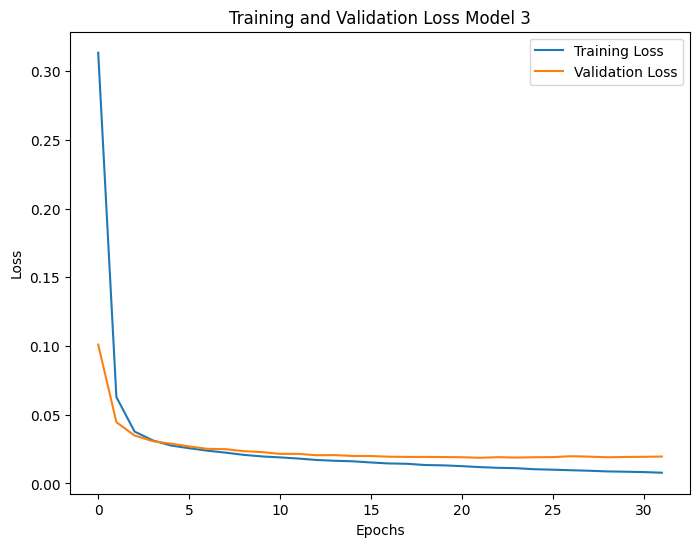

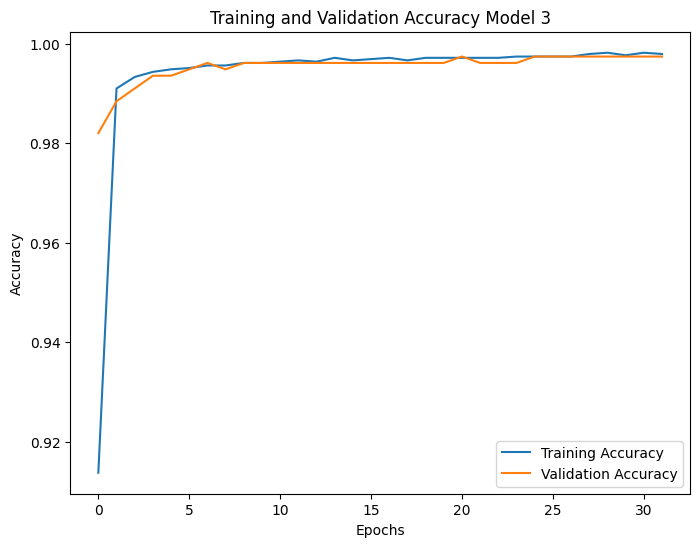

------------------------------------------------------------

Model 4
--------------
Epoch 1/50
122/122 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 0.9214 - val_loss: 0.0773 - val_accuracy: 0.9872
Epoch 2/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0483 - accuracy: 0.9897 - val_loss: 0.0423 - val_accuracy: 0.9884
Epoch 3/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.9931 - val_loss: 0.0347 - val_accuracy: 0.9897
Epoch 4/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0281 - accuracy: 0.9949 - val_loss: 0.0306 - val_accuracy: 0.9910
Epoch 5/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.9956 - val_loss: 0.0273 - val_accuracy: 0.9923
Epoch 6/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.9961 - val_loss: 0.0254 - val_accuracy: 0.9923
Epoch 7/50
122/122 [==============================] - 0s 1ms/st

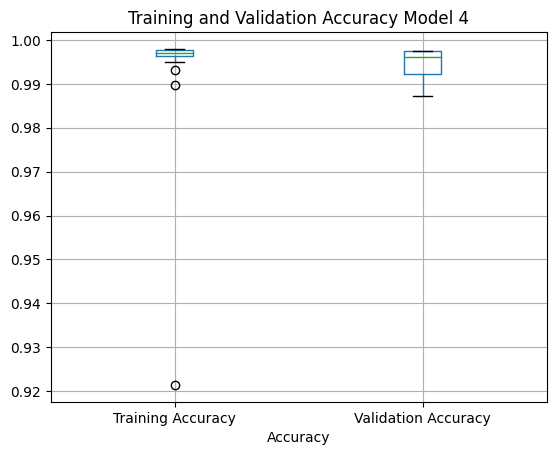


Validation Accuracy Model 4: 0.997433
Train Accuracy Model 4: 0.997689


25/25 [==============================] - 0s 620us/step

Confusion Matrix Model 4:
            pred:White  pred:Red
true:White         612         0
true:Red             2       165


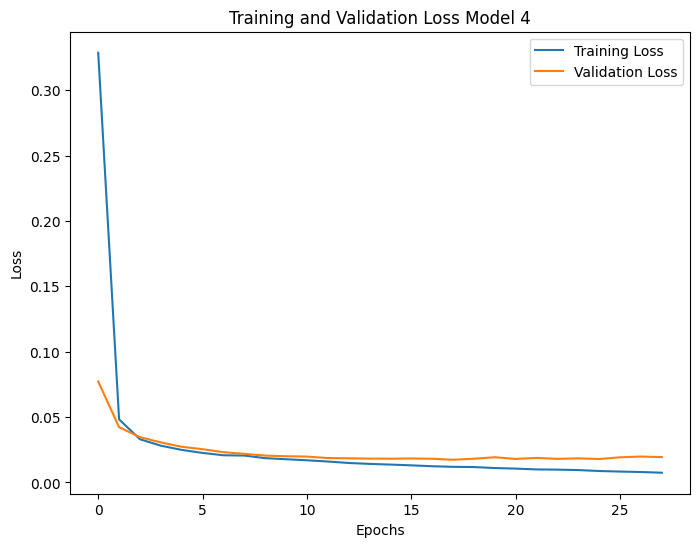

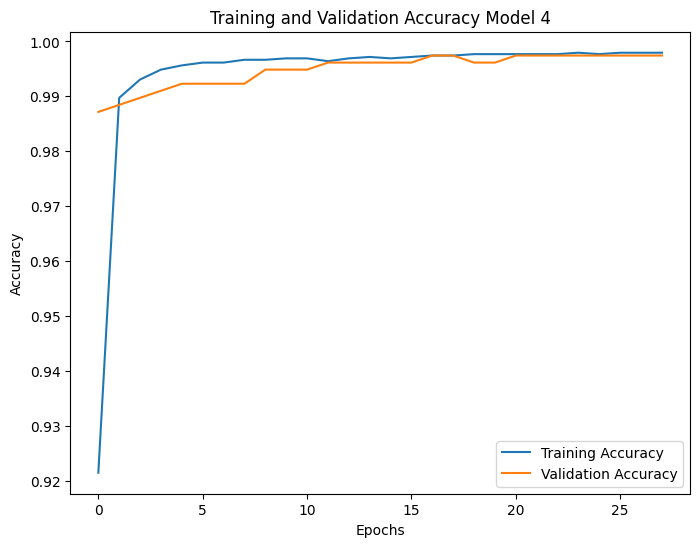

------------------------------------------------------------

Model 5
--------------
Epoch 1/50
122/122 [==============================] - 1s 2ms/step - loss: 0.2938 - accuracy: 0.9327 - val_loss: 0.0389 - val_accuracy: 0.9884
Epoch 2/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9936 - val_loss: 0.0268 - val_accuracy: 0.9949
Epoch 3/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.9956 - val_loss: 0.0230 - val_accuracy: 0.9936
Epoch 4/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9964 - val_loss: 0.0180 - val_accuracy: 0.9961
Epoch 5/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0211 - accuracy: 0.9961 - val_loss: 0.0171 - val_accuracy: 0.9961
Epoch 6/50
122/122 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9967 - val_loss: 0.0182 - val_accuracy: 0.9961
Epoch 7/50
122/122 [==============================] - 0s 1ms/st

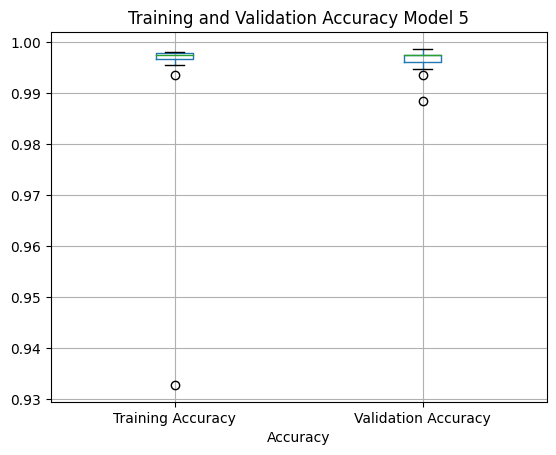


Validation Accuracy Model 5: 0.997433
Train Accuracy Model 5: 0.997689


25/25 [==============================] - 0s 600us/step

Confusion Matrix Model 5:
            pred:White  pred:Red
true:White         612         0
true:Red             2       165


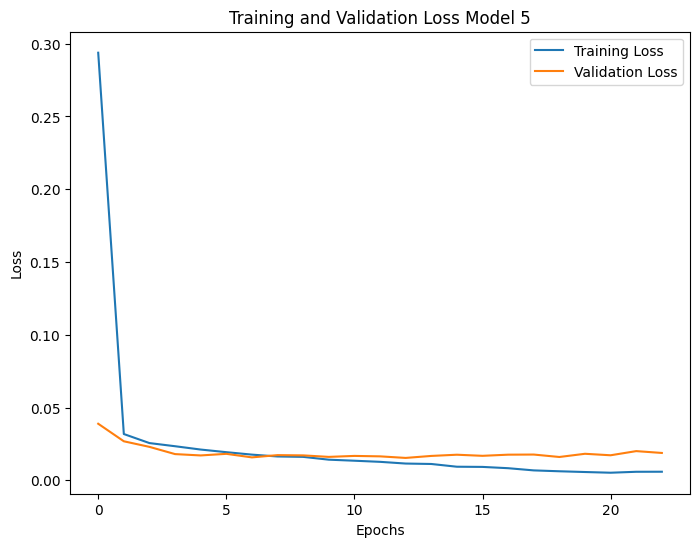

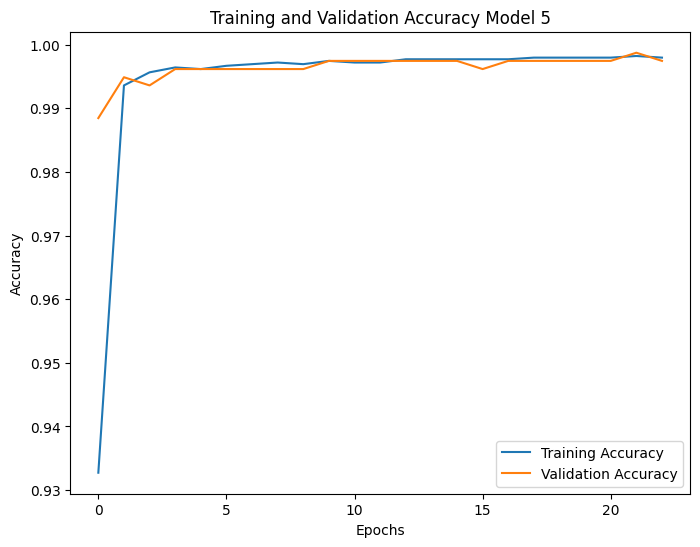

------------------------------------------------------------

Best Model Architecture: [16, 1]
Epoch 1/50
147/147 [==============================] - 0s 767us/step - loss: 0.3435 - accuracy: 0.9071
Epoch 2/50
147/147 [==============================] - 0s 728us/step - loss: 0.1336 - accuracy: 0.9799
Epoch 3/50
147/147 [==============================] - 0s 734us/step - loss: 0.0778 - accuracy: 0.9865
Epoch 4/50
147/147 [==============================] - 0s 741us/step - loss: 0.0567 - accuracy: 0.9891
Epoch 5/50
147/147 [==============================] - 0s 718us/step - loss: 0.0463 - accuracy: 0.9904
Epoch 6/50
147/147 [==============================] - 0s 733us/step - loss: 0.0404 - accuracy: 0.9914
Epoch 7/50
147/147 [==============================] - 0s 739us/step - loss: 0.0364 - accuracy: 0.9932
Epoch 8/50
147/147 [==============================] - 0s 742us/step - loss: 0.0335 - accuracy: 0.9934
Epoch 9/50
147/147 [==============================] - 0s 749us/step - loss: 0.0314 - accu

'\nConfusion Matrix for Best Model:'

            pred:White  pred:Red
true:White         151         0
true:Red             1        43


In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics

# Define the model architectures as a list
model_architectures = [
    [16, 1],    # Model 1
    [16, 8, 1],   # Model 2
    [32, 16, 1],   # Model 3
    [32, 16, 8, 1],   # Model 4
    [64, 32, 16, 8, 1]   # Model 5
]

best_validation_accuracy = 0.0
best_training_accuracy = 0.0
best_model_architecture = None

# Train and evaluate the models
for i, architecture in enumerate(model_architectures):
    print(f"\nModel {i + 1}")
    print("--------------")
    

    # Build the model
    model = Sequential()
    model.add(Dense(architecture[0], activation='relu', input_shape=(12,)))
    for units in architecture[1:-1]:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(architecture[-1], activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # Define early stopping callback
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_data=(X_val, y_val), verbose=1,
                        callbacks=[early_stopping])

    # Check if the current model has a higher validation accuracy and training accuracy than the previous best
    validation_accuracy = history.history['val_accuracy'][-1]
    training_accuracy = history.history['accuracy'][-1]

    if validation_accuracy > best_validation_accuracy and training_accuracy > best_training_accuracy:
        best_validation_accuracy = validation_accuracy
        best_training_accuracy = training_accuracy
        best_model_architecture = architecture

    # Print training and validation accuracy
    print(f'Training Accuracy Model {i + 1}:')
    print(history.history['accuracy'])
    print(f'Validation Accuracy Model {i + 1}:')
    print(history.history['val_accuracy'])

    # Create a DataFrame of training and validation accuracy
    ta = pd.DataFrame(history.history['accuracy'], columns=['Training Accuracy'])
    va = pd.DataFrame(history.history['val_accuracy'], columns=['Validation Accuracy'])
    tva = pd.concat([ta, va], axis=1)

    # Plot boxplot of training and validation accuracy
    tva.boxplot()
    plt.xlabel('Accuracy')
    plt.title(f'Training and Validation Accuracy Model {i + 1}')
    plt.show()

    # Evaluate the model on validation data
    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    print(f'\nValidation Accuracy Model {i + 1}: %.6f' % acc)

    # Evaluate the model on train data
    loss, acc = model.evaluate(X_train, y_train, verbose=0)
    print(f'Train Accuracy Model {i + 1}: %.6f\n\n' % acc)

    # Make predictions on validation data
    y_pred = np.round(model.predict(X_val))
    print(f'\nConfusion Matrix Model {i + 1}:')
    print(pd.DataFrame(metrics.confusion_matrix(y_val, y_pred, labels=[0, 1]), index=['true:White', 'true:Red'], columns=['pred:White', 'pred:Red']))

    # Plot training and validation loss curves
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 6))
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss Model {i + 1}')
    plt.legend()
    plt.show()

    # Plot training and validation accuracy curves
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    plt.figure(figsize=(8, 6))
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy Model {i + 1}')
    plt.legend()
    plt.show()

    print("------------------------------------------------------------")

# Print the best model architecture
print(f"\nBest Model Architecture: {best_model_architecture}")

# Train the best model architecture on the combined training and validation data
best_model = Sequential()
best_model.add(Dense(best_model_architecture[0], activation='relu', input_shape=(12,)))
for units in best_model_architecture[1:-1]:
    best_model.add(Dense(units, activation='relu'))
best_model.add(Dense(best_model_architecture[-1], activation='sigmoid'))

best_model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

history_best = best_model.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)),
                            epochs=50, batch_size=32, verbose=1)

# Evaluate the best model on testing data
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'\nTesting Accuracy of Best Model: {accuracy}')

# Make predictions on testing data
y_pred = np.round(best_model.predict(X_test))
display('\nConfusion Matrix for Best Model:')
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]), index=['true:White', 'true:Red'], columns=['pred:White', 'pred:Red']))

In [12]:
# Define the hyperparameters for tuning
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
activation_functions = ['relu', 'sigmoid']
epochs = 50

# Create a list to store the results
results = []

# Perform hyperparameter tuning
for lr in learning_rates:
    for bs in batch_sizes:
        for activation in activation_functions:
            # Clear previous model's session and build a new model
            tf.keras.backend.clear_session()
            model = Sequential()
            model.add(Dense(64, activation=activation, input_shape=(12,)))
            model.add(Dense(32, activation=activation))
            model.add(Dense(16, activation=activation))
            model.add(Dense(8, activation=activation))
            model.add(Dense(1, activation='sigmoid'))

            # Compile the model with current hyperparameters
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

            # Train the model
            early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=bs, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

            # Evaluate the model on the validation set
            val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

            # Store the results in the list
            results.append({'Learning Rate': lr, 'Batch Size': bs, 'Activation Function': activation, 'Optimizer': 'adam', 'Validation Accuracy': val_accuracy})

# Create a DataFrame from the results
results_table = pd.DataFrame(results)

# Display the results table
display(results_table)

,Learning Rate,Batch Size,Activation Function,Optimizer,Validation Accuracy
0,0.001,32,relu,adam,0.997433
1,0.001,32,sigmoid,adam,0.994865
2,0.001,64,relu,adam,0.997433
3,0.001,64,sigmoid,adam,0.994865
4,0.001,128,relu,adam,0.997433
5,0.001,128,sigmoid,adam,0.994865
6,0.010,32,relu,adam,0.997433
7,0.010,32,sigmoid,adam,0.994865
8,0.010,64,relu,adam,0.997433
9,0.010,64,sigmoid,adam,0.993582


### Based on the output, the hyperparameters with the best validation result (highest validation accuracy) are:

- Learning Rate: 0.001
- Batch Size: 32
- Activation Function: relu
- Optimizer: Adam

The model configuration with these hyperparameters achieved a validation accuracy of 0.997433, which is the highest among all the tested combinations.

In [13]:
# Select the hyperparameters for the best model
best_learning_rate = 0.001
best_batch_size = 32
best_activation_function = 'relu'
best_optimizer = 'adam'

# Build and compile the best model
best_model = Sequential()
best_model.add(Dense(64, activation=best_activation_function, input_shape=(12,)))
best_model.add(Dense(32, activation=best_activation_function))
best_model.add(Dense(16, activation=best_activation_function))
best_model.add(Dense(8, activation=best_activation_function))
best_model.add(Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=best_learning_rate)
best_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# Train the best model
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
best_model.fit(X_train, y_train, epochs=50, batch_size=best_batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

Test Accuracy: 0.9948717951774597
Validation Accuracy: 0.9974325895309448
7/7 [==============================] - 0s 941us/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       151
           1       1.00      0.98      0.99        44

    accuracy                           0.99       195
   macro avg       1.00      0.99      0.99       195
weighted avg       0.99      0.99      0.99       195

Accuracy Score: 0.9948717948717949
Precision Score: 1.0
Recall Score: 0.9772727272727273
F1 Score: 0.9885057471264368
Validation Accuracy: 0.9974325895309448
Test Accuracy: 0.9948717951774597


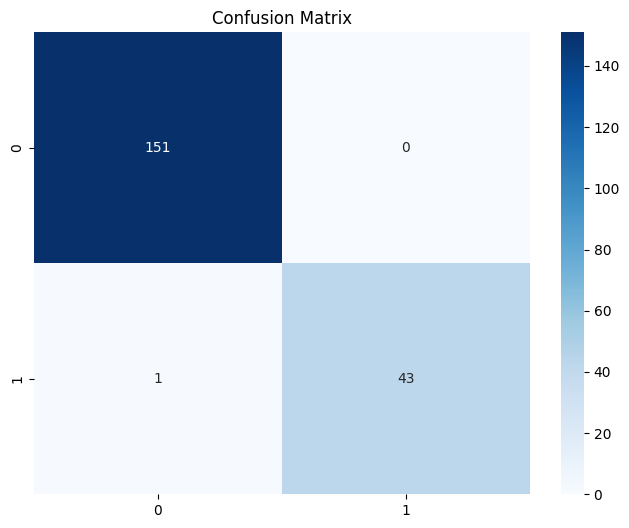

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the best model on the test set and validation set
val_loss, val_accuracy = best_model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)
print("Validation Accuracy:", val_accuracy)

# Compute the confusion matrix
y_pred = np.round(model.predict(X_test))

# Print the classification report
print(metrics.classification_report(y_test, y_pred, labels=[0, 1]))

# Print the accuracy score
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
# Print the precision score
print("Precision Score:", metrics.precision_score(y_test, y_pred))
# Print the recall score
print("Recall Score:", metrics.recall_score(y_test, y_pred))
# Print the F1 score
print("F1 Score:", metrics.f1_score(y_test, y_pred))

#compare the validation and testing result
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Based on the evaluation results, the model performed very well on both the validation and testing data. Here are the observations and discussions:

Accuracy: The model achieved high accuracy on both the validation set (99.74%) and the testing set (99.49%), indicating that it correctly classified the majority of the samples.

Precision: The precision score measures the proportion of correctly predicted positive samples out of the total predicted positives. The model achieved a precision score of 1.0 on both the validation and testing sets, indicating that it had no false positives.

Recall: The recall score measures the proportion of correctly predicted positive samples out of the total actual positives. The model achieved a recall score of 0.98 on the validation set and 0.98 on the testing set, indicating that it captured a high percentage of the actual positive samples.

F1 Score: The F1 score is the harmonic mean of precision and recall and provides a balanced measure of model performance. The model achieved an F1 score of 0.99 on both the validation and testing sets, indicating a good balance between precision and recall.

Comparing the validation and testing results, we can see that the performance is similar, with slight variations in some metrics. The validation accuracy (99.74%) is slightly higher than the test accuracy (99.49%). However, the differences are minimal, suggesting that the model generalizes well to unseen data.

Overall, the model demonstrates high accuracy, precision, recall, and F1 score on both the validation and testing data, indicating its effectiveness in classifying the samples. The close agreement between the validation and testing results suggests that the model is reliable and performs consistently on unseen data.